In [56]:
%%capture
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, accuracy_score, auc, average_precision_score, confusion_matrix, roc_curve, precision_recall_curve, plot_precision_recall_curve
sess = tf.Session()

## Data Preparation

In [3]:
# read in data 
data = pd.read_csv("../data/DataMatched.txt", delimiter="\t")
data.rename(columns={"Unnamed: 0":"features"}, inplace=True)
#data.set_index('features')
# drop last row.  since it has NaN values
data.drop(data.tail(1).index,inplace=True)

In [4]:
# read in target info
target = pd.read_csv("../data/TargetMutations.txt", delimiter="\t")
target.rename(columns={"Unnamed: 0":"features"}, inplace=True)
#target.set_index('features')

In [5]:
# read in info
info = pd.read_csv("../data/infoMatched.txt", delimiter="\t")
info.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

In [94]:
# store/load in x data
datapath = "../data/x.npy"
if not os.path.exists(datapath):
    # store data as numpy array
    x = data.values
    # remove first column (feature names)
    x = x[:,1:]
    # transpose features for classifier
    x = x.T
    np.save(datapath, x)
else: 
    x = np.load(datapath, allow_pickle=True)
# store target as numpy array

targetpath = "../data/tp53.npy"
if not os.path.exists(targetpath):
    y = target.loc[target["features"] == "TP53"].values
    y = np.asarray(y.tolist()[0][1:])
    np.save(targetpath, y)
else: 
    y = np.load(targetpath, allow_pickle=True)

# output feature/target shape
print("features shape:", x.shape)
print("target:", y.shape)

features shape: (9072, 16139)
target: (9072,)


## Train/Validate/Visualize

['TP53', 'PIK3CA', 'KRAS', 'PTEN', 'ARID1A', 'RB1', 'FBXW7', 'NRAS', 'CDKN2A', 'CTNNB1']


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

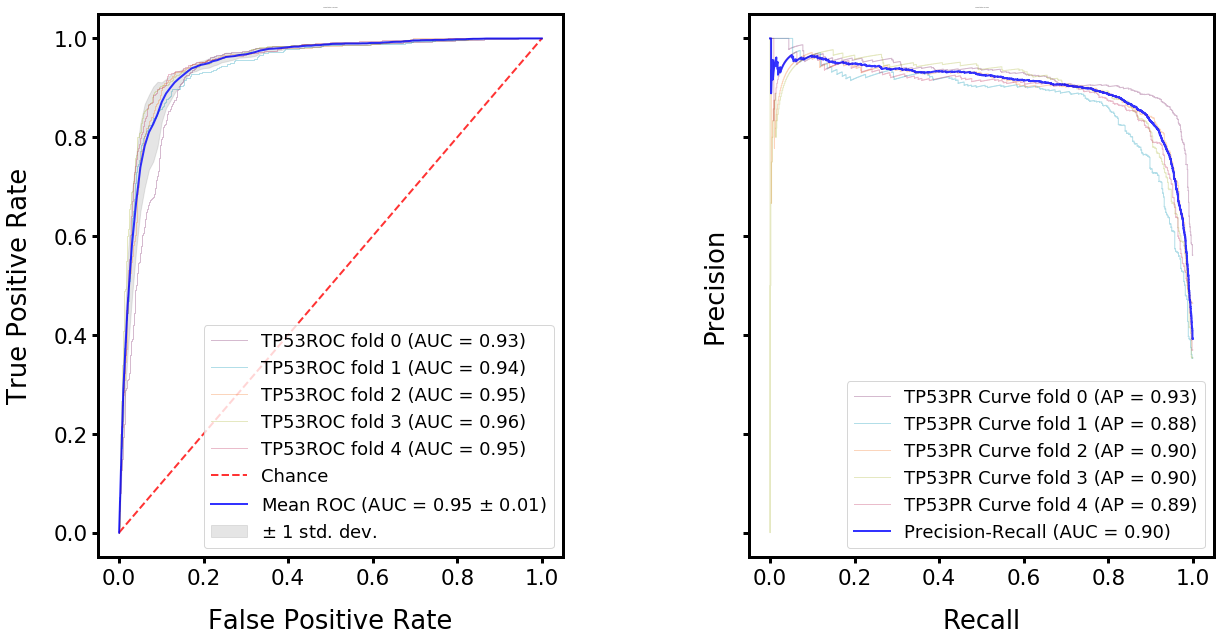

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

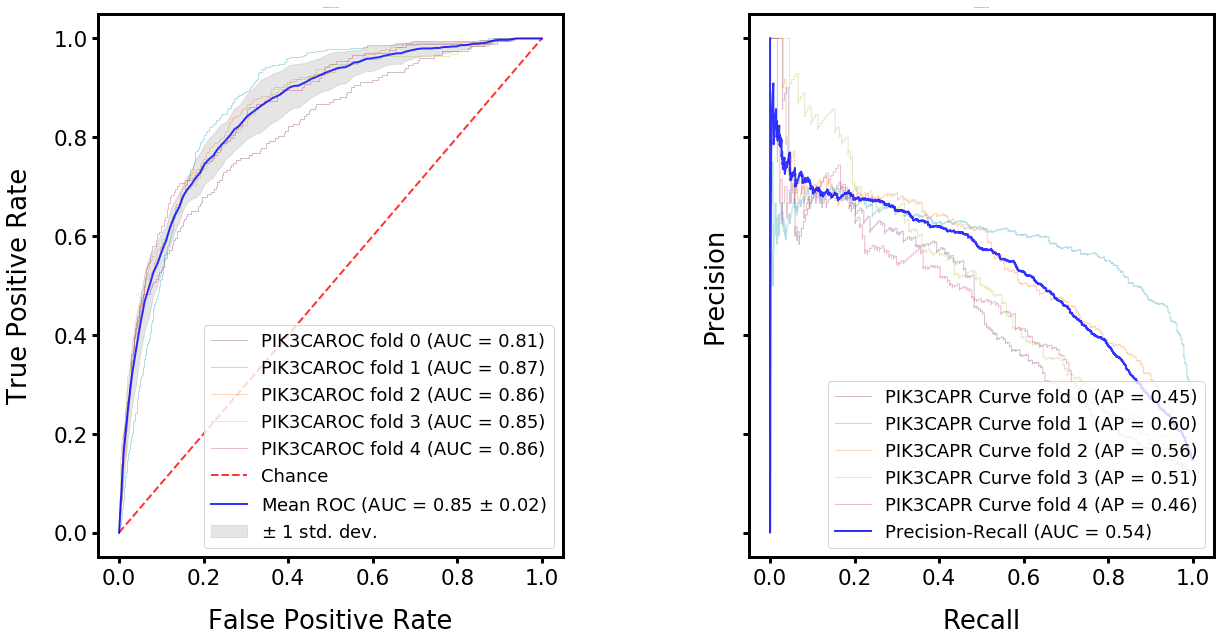

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

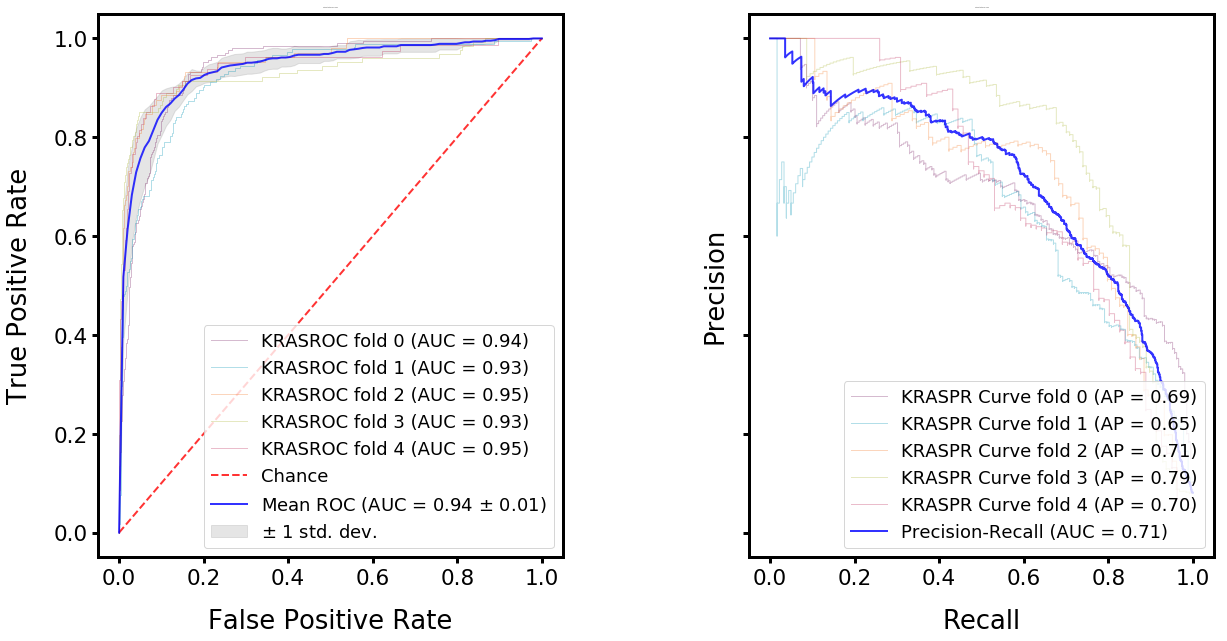

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

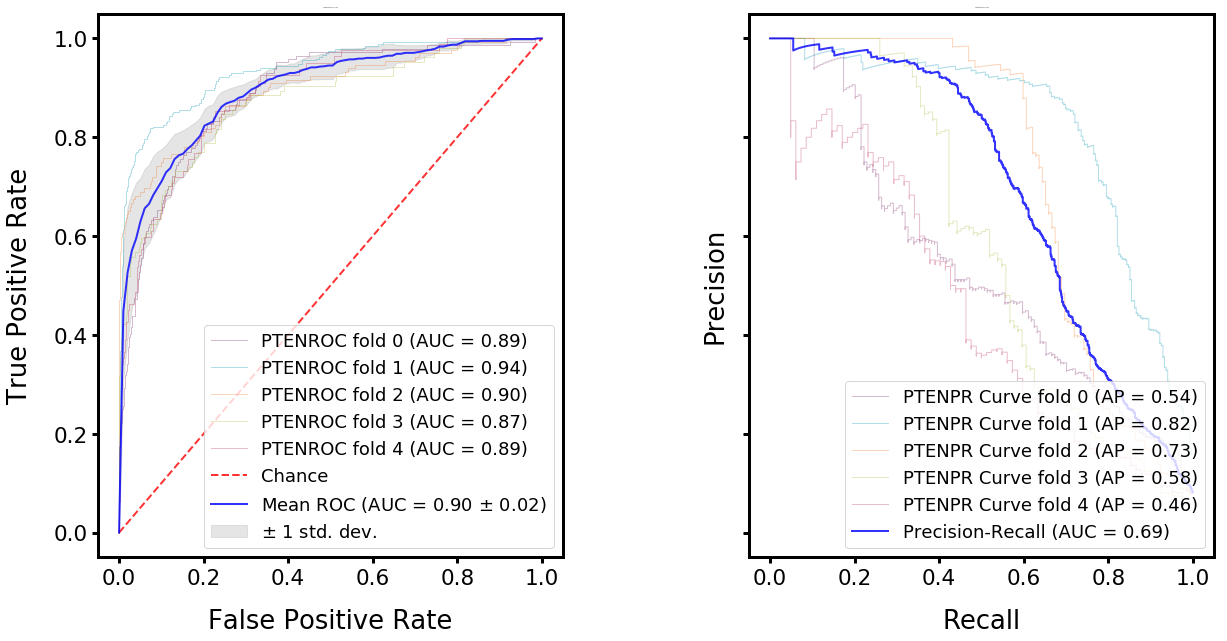

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

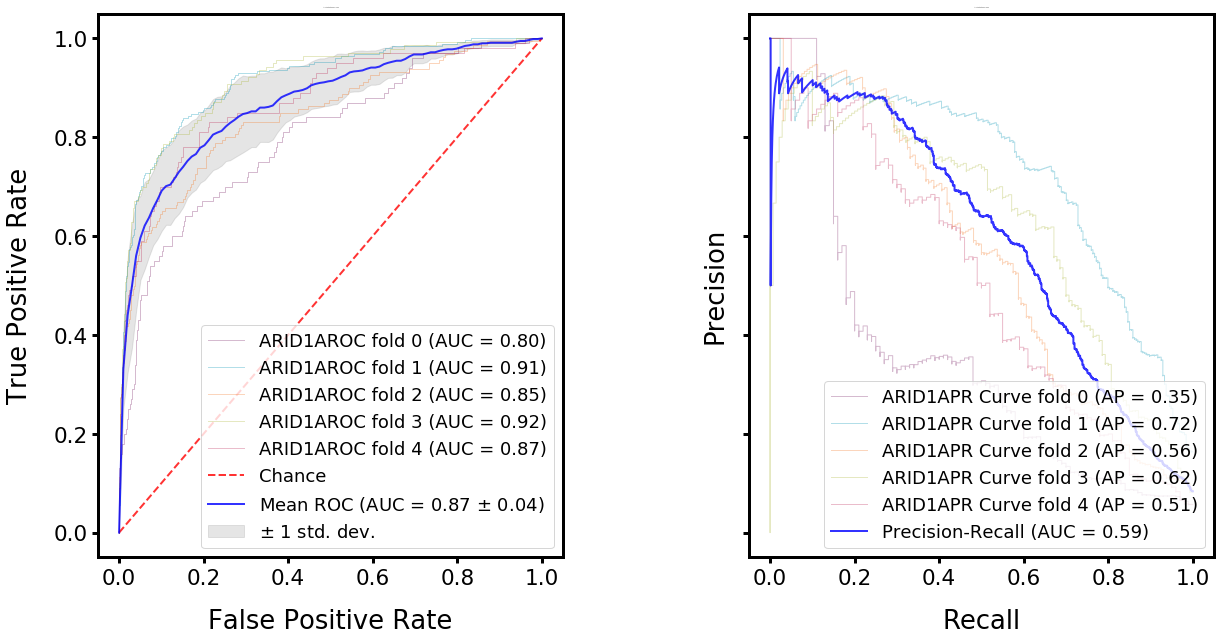

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

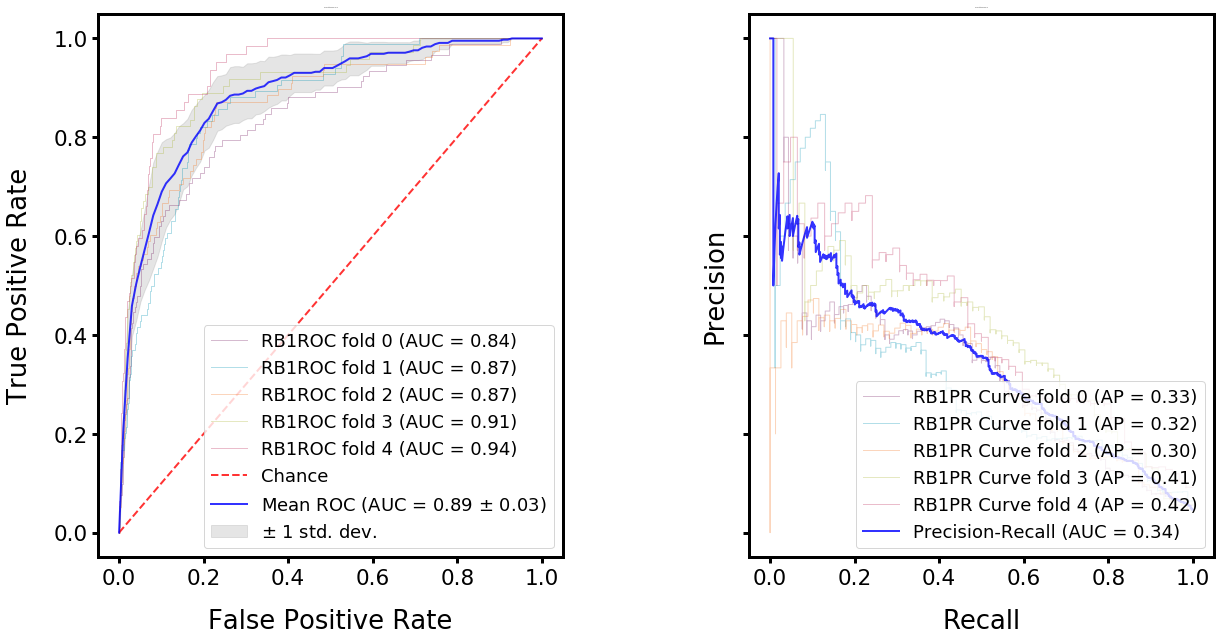

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


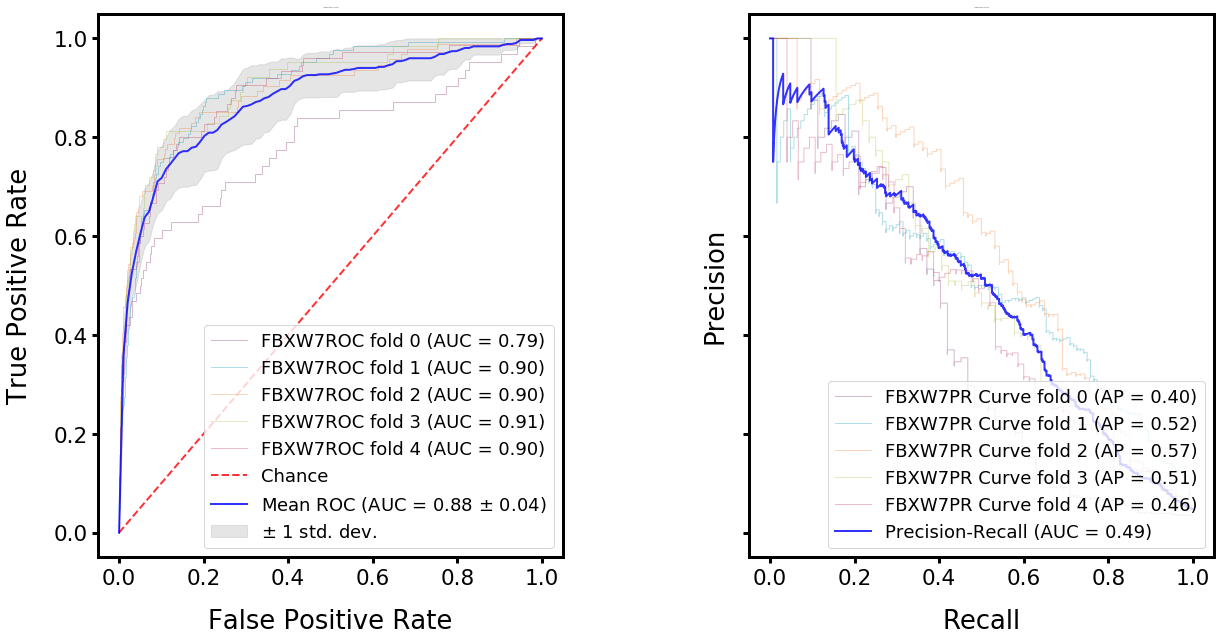

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

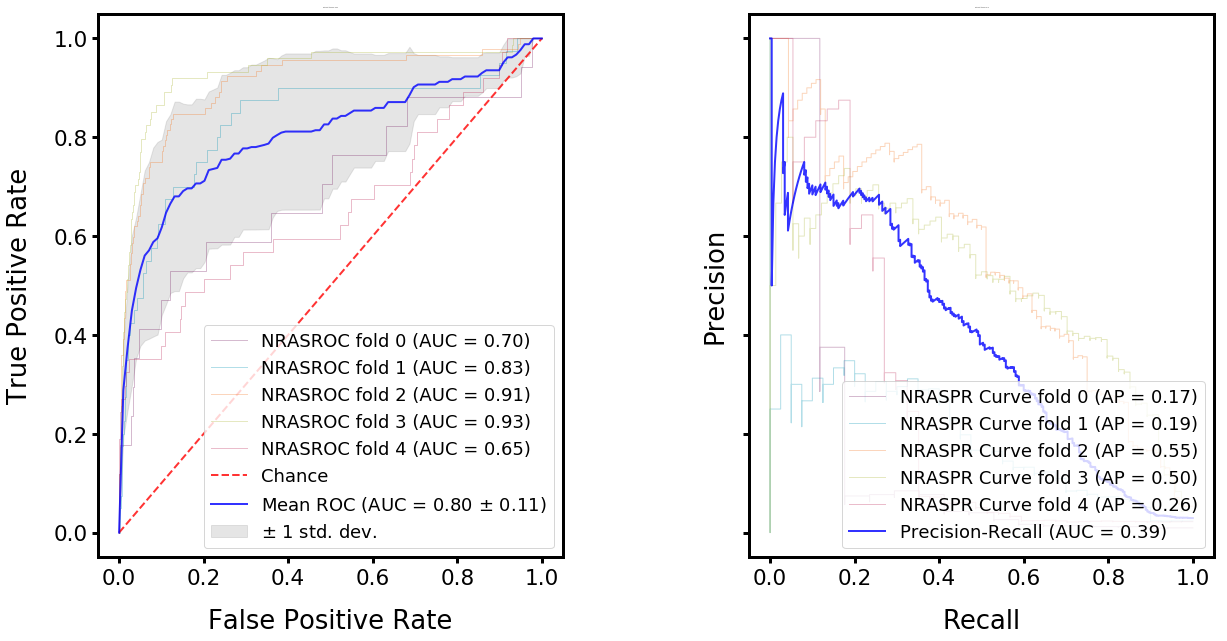

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

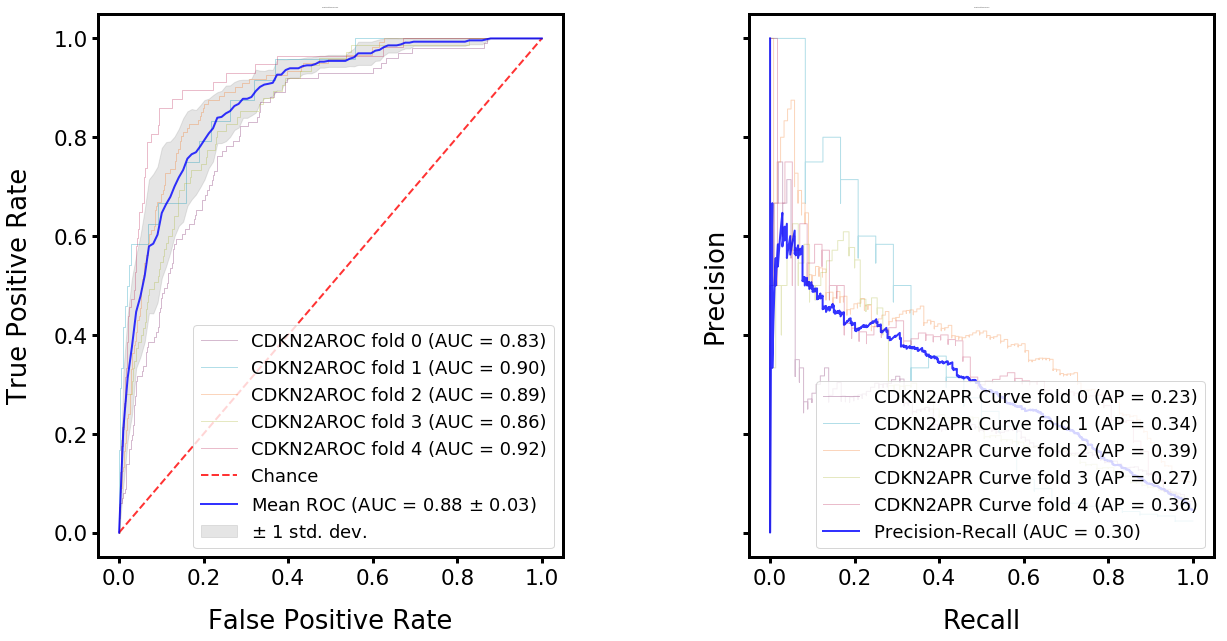

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

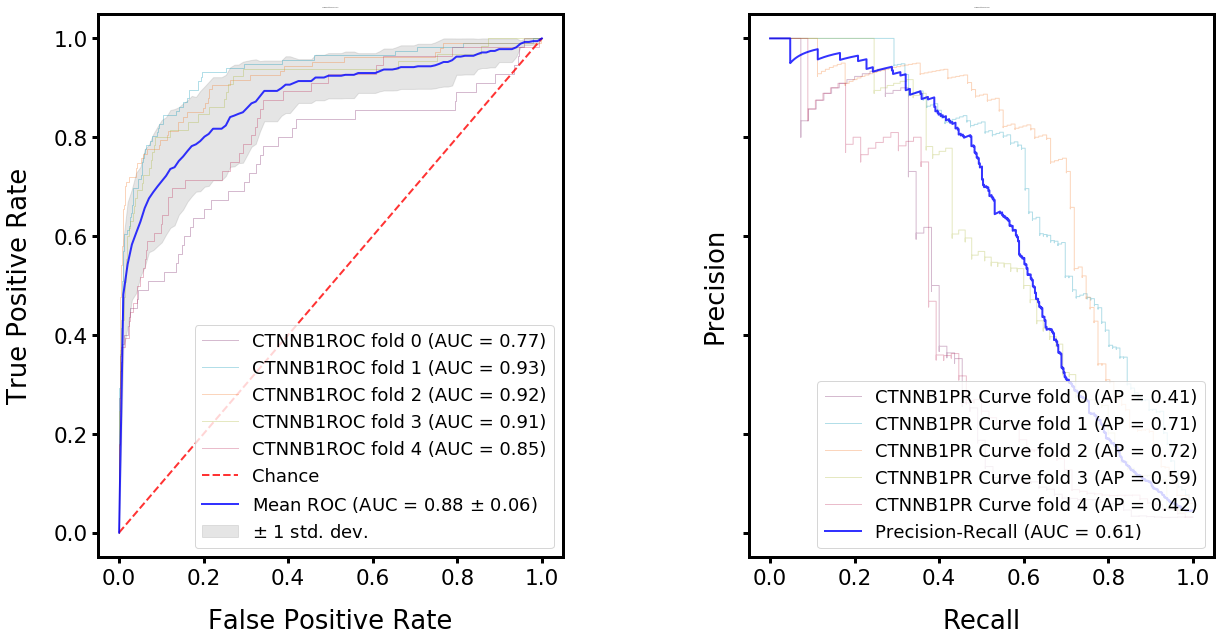

In [97]:
## save additional proteins to be used as Y targets 
more_proteins = "TP53,PIK3CA,KRAS,PTEN,ARID1A,RB1,FBXW7,NRAS,CDKN2A,CTNNB1"
more_proteins=more_proteins.split(",")
print(more_proteins)

# store mean_auc + mean_aupr for each Y value in more_proteins
y_mean_aucs = defaultdict(float)
y_mean_auprs = defaultdict(float)

for prot in more_proteins: 
    # store target for training
    y = target.loc[target["features"] == prot].values # store target protein
    y = np.asarray(y.tolist()[0][1:]) # removes the protein name
    y = y[:800] # shrink dataset 
    y_prot_name = prot
    
    random_state=777
    # define kfold spit
    kf = KFold(n_splits=10)
    kf.get_n_splits(x)
    KFold(n_splits=2, random_state=None, shuffle=False)

    # define elasticnet classifier
    classifier = LogisticRegression(penalty="elasticnet", random_state=random_state, solver="saga", l1_ratio=.5, n_jobs=-1)

    # store parameters for ROC + AUPR Visualization/Analysis
    
    ## AUROC variables
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    ## AUPR Variables
    y_real = []
    y_proba = []

    # train/predict
    #fig, ax = plt.subplots()
    fig, axs = plt.subplots(1, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': 0}, figsize=(8,4))
    (ax1, ax2)= axs # ax1: ROC Curve; ax2: PR Curve
    for i, (train, test) in enumerate(kf.split(x, y)):
        # subset data for train/validation
        X_train, X_test = x[train], x[test]
        y_train, y_test = y[train], y[test]
    
        # fit model + save probabilities for aupr 
        probas_ = classifier.fit(X_train, y_train).predict_proba(X_test) 
        
        # error 
        viz = plot_roc_curve(classifier, X_test, y_test,
                             name=y_prot_name + 'ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax1)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        
        viz = plot_precision_recall_curve(classifier, X_test, y_test,
                             name=y_prot_name + 'PR Curve fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax2)
        y_real.append(y_test)
        y_proba.append(probas_[:, 1])
        
    
    # visualize 
    ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr) # find mean_auc for k-fold cv
    y_mean_aucs[y_prot_name] = mean_auc # save mean_auc for given target
    std_auc = np.std(aucs)
    ax1.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax1.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax1.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax1.legend(loc="lower right")
    ax1.set_title(y_prot_name + "Unstratified ROC Curve")
    
    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)
    precision, recall, _ = precision_recall_curve(y_real, y_proba)
    y_mean_auprs[y_prot_name] = average_precision_score(y_real, y_proba)
    plt.plot(recall, precision, color='b',
             label=r'Precision-Recall (AUC = %0.2f)' % (average_precision_score(y_real, y_proba)),
             lw=2, alpha=.8, ax=ax2)
    ax2.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Precision-Recall curve")
    ax2.set_title(y_prot_name + "Unstratified PR Curve")
    ax2.xlabel('Recall')
    ax2.ylabel('Precision')
    ax2.legend(loc="lower right")
    plt.show()

## Unstratified Aggregate Plots 

In [98]:
import pickle

# view y_mean_aucs dict
print(y_mean_aucs)
# save y_mean_aucs dict
y_mean_aucs_path = "../data/unstrat_mean_aucs.pkl"
pickle.dump(y_mean_aucs, open(y_mean_aucs_path, "wb" ))

# view y_mean_auprs dict
print(y_mean_auprs)
# save y_mean_auprs dict
y_mean_auprs_path =  "../data/unstrat_mean_auprs.pkl"
pickle.dump(y_mean_auprs, open(y_mean_auprs_path, "wb" ))

defaultdict(<class 'float'>, {'RB1': 0.8862514843955409, 'NRAS': 0.8049164277041515, 'PTEN': 0.8950990914259928, 'CDKN2A': 0.8802557330693197, 'FBXW7': 0.8780403852642186, 'PIK3CA': 0.8512336924205302, 'KRAS': 0.9391122698767107, 'TP53': 0.9462392204825241, 'CTNNB1': 0.8750623685471195, 'ARID1A': 0.8695550726613719})
defaultdict(<class 'float'>, {'RB1': 0.3414614303141914, 'NRAS': 0.39083293146086995, 'PTEN': 0.6878167682456785, 'CDKN2A': 0.3012315777043571, 'FBXW7': 0.48842732025601104, 'PIK3CA': 0.5356459714038055, 'KRAS': 0.7092848090960592, 'TP53': 0.9017445458764948, 'CTNNB1': 0.6130388206954502, 'ARID1A': 0.5939998959209025})


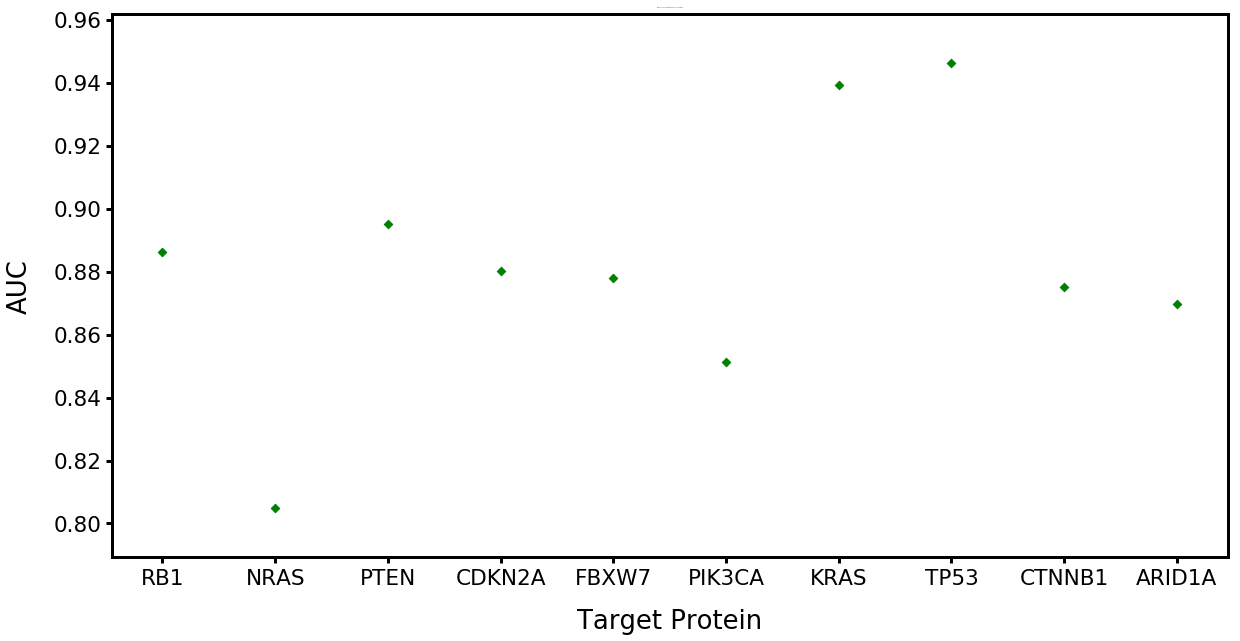

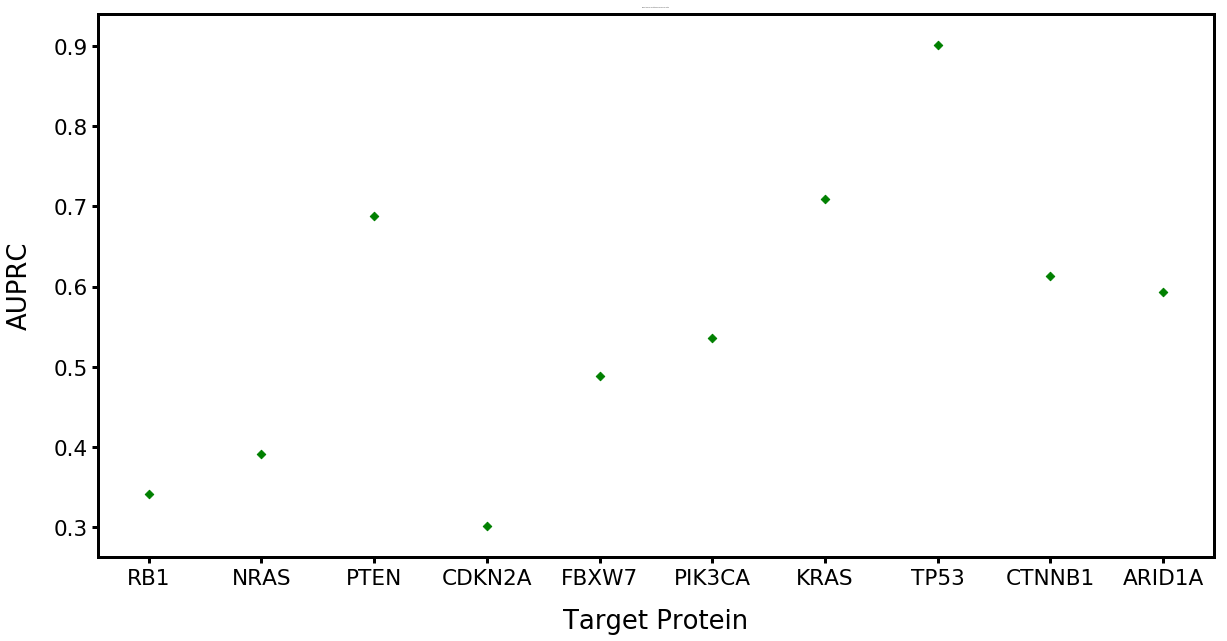

In [101]:
# plot mean AUC for unstratified kFold Cross Validation
xx = y_mean_aucs.keys()
yy = y_mean_aucs.values()
plt.figure(figsize=(20,10))
plt.xlabel("Target Protein")
plt.ylabel("AUC")
plt.scatter(xx,yy, color="green", marker="D")
plt.title("Mean AUC for Unstratified 5-Fold Cross Validation")
plt.show()

xx = y_mean_auprs.keys()
yy = y_mean_auprs.values()
plt.figure(figsize=(20,10))
plt.xlabel("Target Protein")
plt.ylabel("AUPRC")
plt.scatter(xx,yy, color="green", marker="D")
plt.title("Mean AUPRC for Unstratified 5-Fold Cross Validation")
plt.show()

## Stratified vs. Unstratified Analysis 

In [105]:
strat_mean_auprs = pickle.load(open( "../data/strat_mean_auprs.pkl", "rb" ))
unstrat_mean_auprs = pickle.load(open( "../data/unstrat_mean_auprs.pkl", "rb" ))

In [109]:
print(strat_mean_auprs)
print()
print(unstrat_mean_auprs)

defaultdict(<class 'float'>, {'RB1': 0.2080021331735764, 'CDKN2A': 0.15154645961780927, 'KRAS': 0.4873382124725437, 'NRAS': 0.05166164794521935, 'FBXW7': 0.4591044030242563, 'PIK3CA': 0.4047533592626117, 'PTEN': 0.5439590872742054, 'TP53': 0.8431678601272479, 'CTNNB1': 0.3598771440099032, 'ARID1A': 0.5409627819349359})

defaultdict(<class 'float'>, {'RB1': 0.3414614303141914, 'NRAS': 0.39083293146086995, 'PTEN': 0.6878167682456785, 'CDKN2A': 0.3012315777043571, 'FBXW7': 0.48842732025601104, 'PIK3CA': 0.5356459714038055, 'KRAS': 0.7092848090960592, 'TP53': 0.9017445458764948, 'CTNNB1': 0.6130388206954502, 'ARID1A': 0.5939998959209025})


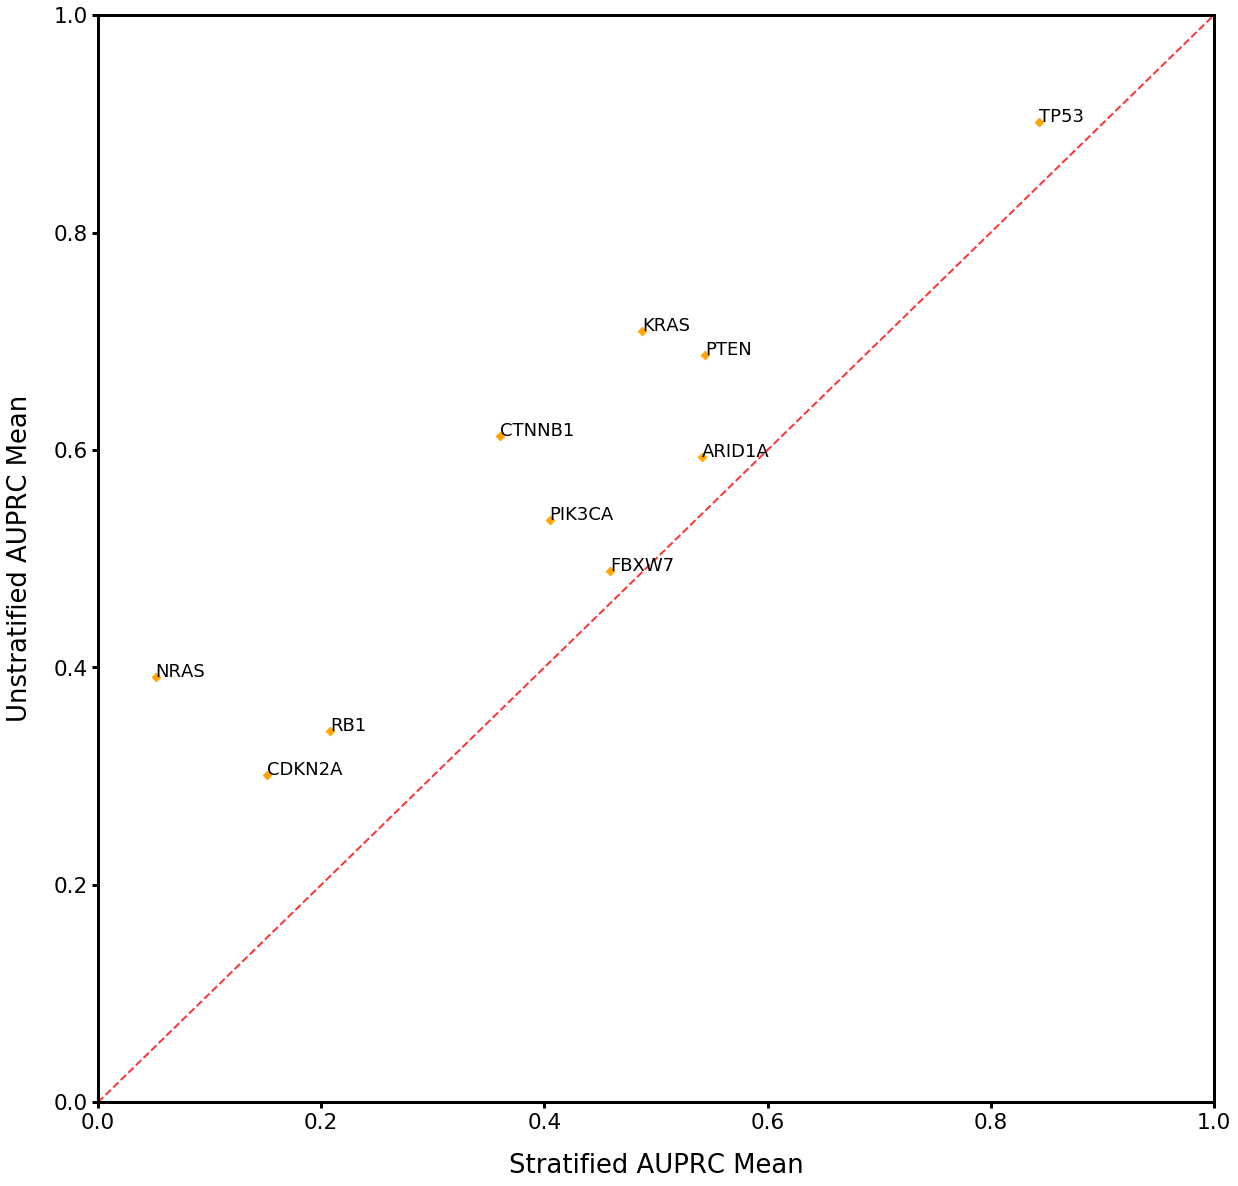

In [128]:
assert(strat_mean_auprs.keys() == unstrat_mean_auprs.keys())
strats = []
unstrats = []
labels = []
for key in strat_mean_auprs.keys(): 
    labels.append(key)
    strats.append(strat_mean_auprs[key])
    unstrats.append(unstrat_mean_auprs[key])
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
ax.set(xlim=[0, 1], ylim=[0, 1], xlabel="Stratified AUPRC Mean", ylabel="Unstratified AUPRC Mean")
ax.scatter(strats, unstrats, color="orange", marker="D")
for i, txt in enumerate(labels):
    ax.annotate(txt, (strats[i], unstrats[i]))
plt.show()

Based on the points all being to the left of `y=x` we cacn conclude that for the proteins examined the unstratified method of cross validation results in better model performance.